## Random Forests

In this practical session you will be using the iris flower dataset and use a Random Forest classifier for making predications 
for feature seclection and then for generating a new model based on the selected features.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
      
# Load the iris dataset
iris = datasets.load_iris()

**Task 1:** Print the target names (target_names), the feature names (feature_names), the top five records of the iris flower dataset and the iris labels (0, 1, 2).

In [2]:
print(iris.target_names)

print(iris.feature_names)

print(iris.data[0:5])

print(iris.target)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Task 2**: Create a data frame for the iris flower dataset and use the head() method to display to top n rows of the data frame.

In [3]:
df = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Task 3**: Separate the columns into features and labels and then split the resulting two variables into a training set (70\%) and a test set (30\%).

In [4]:
from sklearn.model_selection import train_test_split

X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]   
y = df['species']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456) 

**Task 4**: Create a Random Forest classifier with 100 trees in the forest, train the model on the training set and perform predictions on the test set.

In [5]:
clf = RandomForestClassifier(n_estimators=100, random_state=123456)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

**Task 5**: Import the scikit-learn metrics module and calculate the accuracy of the classifier.

In [6]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


**Task 6**: Make a predication for a single instance of your choice.

In [7]:
clf.predict([[5.1, 3.5, 1.4, 0.2]])

array([0])

**Task 7**: Explore how you can display the feature importance scores of the classifier (using the feature_importances_ attribute).

In [8]:
feature_importance = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_importance

petal length (cm)    0.483066
petal width (cm)     0.405630
sepal length (cm)    0.091016
sepal width (cm)     0.020289
dtype: float64

**Task 8**: Create a bar plot using the seaborn library and visualise the feature importance score.

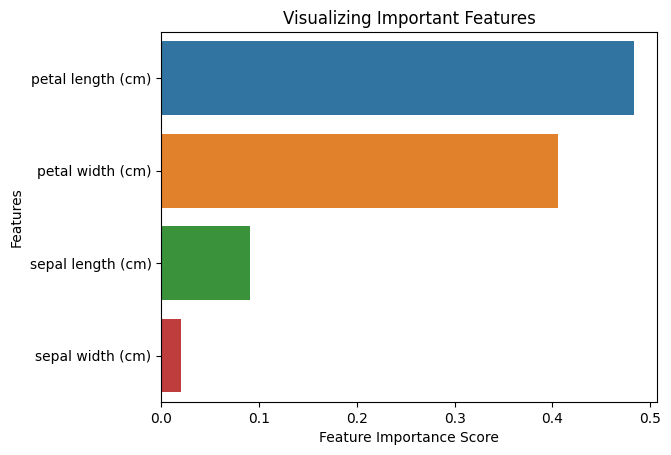

In [9]:
%matplotlib inline

sns.barplot(x=feature_importance, y=feature_importance.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

**Task 9**: Remove the "sepal width" feature because this feature has very low importance. Select the 3 remaining features and split the dataset into features and labels. Produce again training set (70%) and a test set (30%). 

In [10]:
X_2 = df[['petal length', 'petal width', 'sepal length']]  
y_2 = df['species']    

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.30, random_state=123456)

**Task 10:** Generate a model using a Random Forest classifier as before, train the model using the new training set, perform predications on the new test set and display the accuracy of the new classifier.

In [11]:
clf_2 = RandomForestClassifier(n_estimators=100, random_state=123456)

clf_2.fit(X_train_2, y_train_2)

y_pred_2 = clf_2.predict(X_test_2)

print("Accuracy:", accuracy_score(y_test_2, y_pred_2))

Accuracy: 0.9555555555555556
